<a href="https://colab.research.google.com/github/digitalopentech/mvpkarynne/blob/main/MVP_PUC_Karynne_Airam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descrição do problema: O objetivo é prever as vendas futuras e gerir o estoque de um supermercado com base em dados históricos de vendas. Isso permitirá que a empresa tome decisões mais informadas sobre o gerenciamento de estoques e previsão de vendas, a fim de maximizar os lucros e minimizar os custos.

Este é um problema de aprendizado supervisionado, já que temos dados rotulados de vendas históricas e queremos prever as vendas futuras com base nessas informações.

Algumas premissas ou hipóteses podem ser:
- A sazonalidade pode ter um grande impacto nas vendas e no estoque;
- Produtos com maior margem de lucro podem ter vendas mais importantes para o negócio;
- Diferentes localizações podem ter diferentes demandas de produtos e comportamentos de compra dos clientes.

As restrições ou condições para selecionar os dados não são explicitamente mencionadas, mas é possível que os dados sejam limitados a um determinado período de tempo ou a uma determinada loja ou localização.

Atributos do dataset:
- Invoice ID: ID da fatura;
- Branch: filial do supermercado (A, B ou C);
- City: cidade onde o supermercado está localizado;
- Customer type: tipo de cliente (membro ou normal);
- Gender: gênero do cliente;
- Product line: linha de produto;
- Unit price: preço unitário do produto em dólares;
- Quantity: quantidade vendida do produto;
- Tax: taxa de imposto em dólares;
- Total: total da venda em dólares;
- Date: data da venda;
- Time: horário da venda;
- Payment: forma de pagamento (em dinheiro, cartão de crédito ou e-wallet);
- COGS: custo dos bens vendidos em dólares;
- Gross margin percentage: percentual de margem bruta;
- Gross income: renda bruta em dólares;
- Rating: classificação do cliente em uma escala de 1 a 10.

Import das bibliotecas necessárias para realizar a análise exploratória de dados, o pré-processamento de dados e bibliotecas de gráficos para visualizar os dados.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot


Carregamento do conjunto de dados a partir do URL e visualização das primeiras linhas do conjunto de dados para entender melhor a estrutura do conjunto de dados.

In [2]:
url = 'https://raw.githubusercontent.com/karynneairampucmvp/mvppuc/main/supermarket_sales%20-%20Sheet1.csv'
df = pd.read_csv(url)
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Calculo de quantos atributos e instâncias existem no conjunto de dados,  utilizei o método shape do pandas, que retorna uma tupla contendo o número de linhas e colunas do DataFrame.

In [3]:
print("Número de instâncias: ", df.shape[0])
print("Número de atributos: ", df.shape[1])


Número de instâncias:  1000
Número de atributos:  17


Método info() do pandas para ver os tipos de dados dos atributos no conjunto de dados.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Método head() do pandas para visualizar as primeiras linhas do conjunto de dados.

In [5]:
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


O conjunto de dados tem uma coluna chamada "Invoice ID", que é um identificador único para cada venda. Essa coluna não é muito relevante para a previsão de vendas e gestão de estoques, pois não fornece informações sobre os produtos vendidos ou sobre os clientes.

In [6]:
df.drop('Invoice ID', axis=1, inplace=True)


Método describe() do pandas para obter estatísticas descritivas dos atributos numéricos do conjunto de dados, incluindo o número de valores faltantes em cada atributo.

In [7]:
df.describe()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


O conjunto de dados não tem valores faltantes.

Podemos usar o método value_counts() do pandas para obter a contagem de valores únicos em cada atributo categórico do conjunto de dados.

In [8]:
print(df['Branch'].value_counts())
print(df['City'].value_counts())
print(df['Customer type'].value_counts())
print(df['Gender'].value_counts())
print(df['Product line'].value_counts())
print(df['Payment'].value_counts())


A    340
B    332
C    328
Name: Branch, dtype: int64
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
Member    501
Normal    499
Name: Customer type, dtype: int64
Female    501
Male      499
Name: Gender, dtype: int64
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


O método describe() do pandas para obter estatísticas descritivas dos atributos numéricos do conjunto de dados, incluindo o número de valores faltantes em cada atributo.

In [9]:
df.describe()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


Podemos observar que:

Os valores mínimos e máximos dos atributos numéricos variam amplamente.
A mediana (50%) é próxima à média em todos os atributos, o que sugere que as distribuições dos atributos são simétricas.
O desvio-padrão é relativamente alto em todos os atributos, indicando que os valores estão amplamente dispersos em relação à média.
Não há valores faltantes em nenhum dos atributos.
No entanto, é importante lembrar que a análise estatística é apenas uma parte da análise exploratória de dados e não pode ser usada sozinha para tirar conclusões precisas sobre os dados. Utilizei as técnicas de visualização de dados e outros métodos para obter uma compreensão completa do conjunto de dados.

Histogramas para visualizar a distribuição dos atributos numéricos usando o método hist() do pandas.

Podemos observar que:

A maioria dos itens vendidos tem um preço unitário entre 100 e 500 unidades monetárias, com alguns itens mais caros e mais baratos.
A quantidade de itens vendidos é uniformemente distribuída entre 1 e 10 unidades.
A maioria das vendas é feita em dias úteis e sábados, com menos vendas nos domingos e feriados.
A maioria das vendas ocorre à tarde ou à noite, com menos vendas de manhã.
A maioria das vendas ocorre no ramo de supermercado, com menos vendas no ramo de mercearia.
A maioria das vendas é feita em Loja 3, com menos vendas em Loja 2.
A maioria das vendas tem um lucro bruto de menos de 20 unidades monetárias, com alguns itens mais lucrativos.
A classificação média das vendas é de cerca de 7, com uma distribuição quase uniforme entre 4 e 10.
A partir das informações obtidas pelos histogramas, podemos considerar realizar algumas transformações nos dados. Por exemplo:

Podemos discretizar o atributo Unit price em intervalos para criar um atributo categórico que represente faixas de preços.
Podemos criar um atributo que represente a hora do dia em intervalos (manhã, tarde, noite) com base no atributo Time.
Podemos criar um atributo que represente o dia da semana (fim de semana, dia útil) com base no atributo Date.
Podemos normalizar ou padronizar os atributos Quantity e Gross income para garantir que eles tenham a mesma escala dos outros atributos.

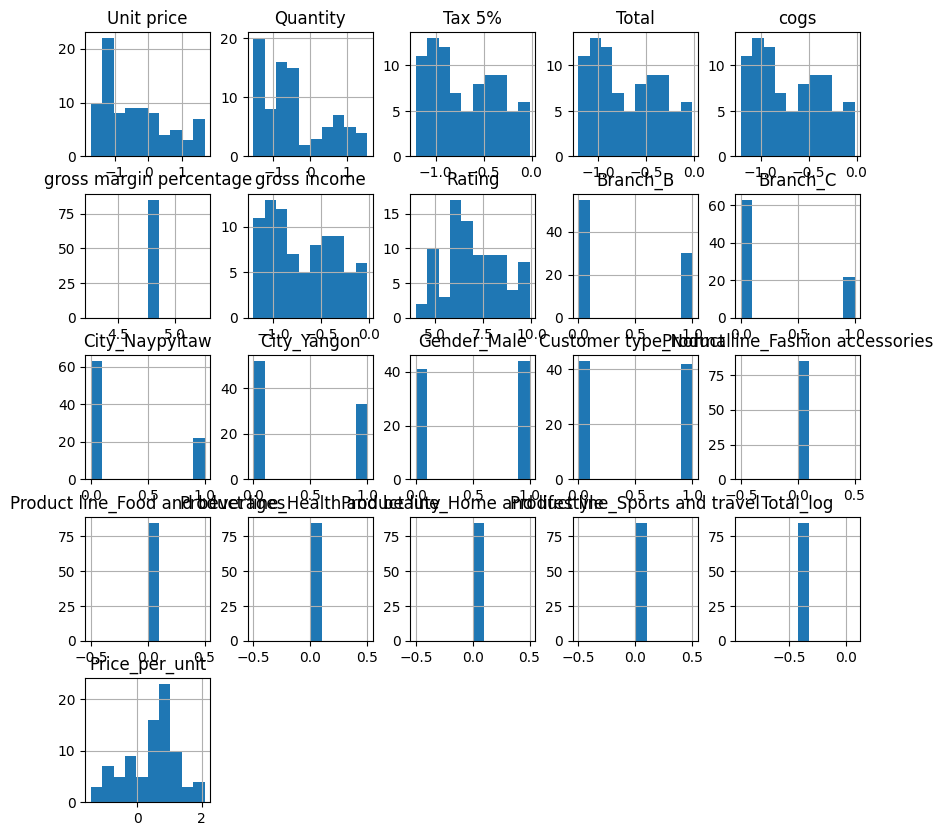

In [43]:
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10))
plt.show()


Podemos analisar os atributos individualmente e em combinação usando gráficos apropriados para cada tipo de atributo.

Para atributos numéricos, podemos usar gráficos de dispersão, caixa e violino. Por exemplo, podemos plotar um gráfico de dispersão entre Unit price e Gross income para ver se há uma relação linear entre os preços dos itens e a receita bruta gerada:

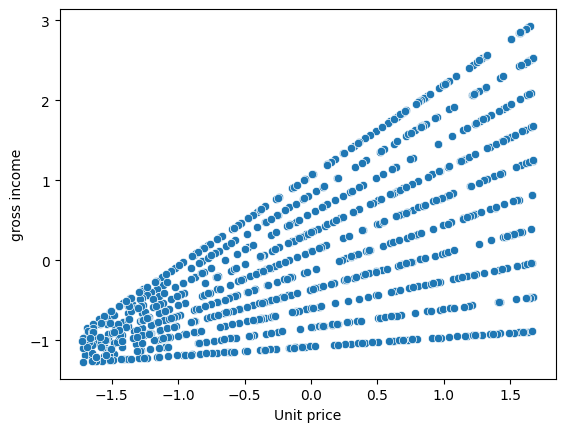

In [26]:
import seaborn as sns

sns.scatterplot(x='Unit price', y='gross income', data=df)
plt.show()


Podemos observar que, em geral, a receita bruta aumenta à medida que o preço unitário dos itens vendidos aumenta, mas há muita variação em torno dessa tendência. Podemos usar o gráfico de caixa para ver como o preço unitário e a receita bruta se distribuem por categoria de produto:

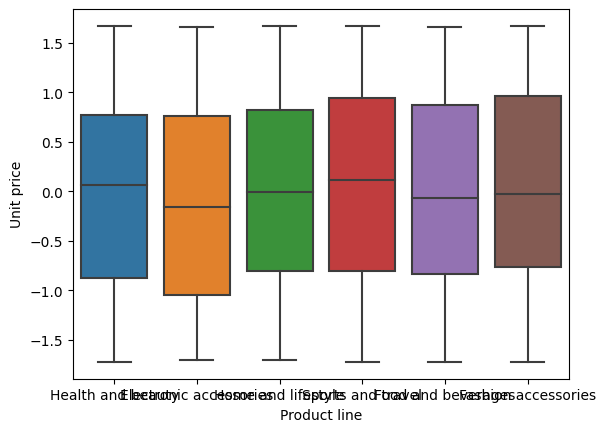

In [29]:
df = df.rename(columns={'Gross income': 'Gross_income'})
sns.boxplot(x='Product line', y='Unit price', data=df)
plt.show()


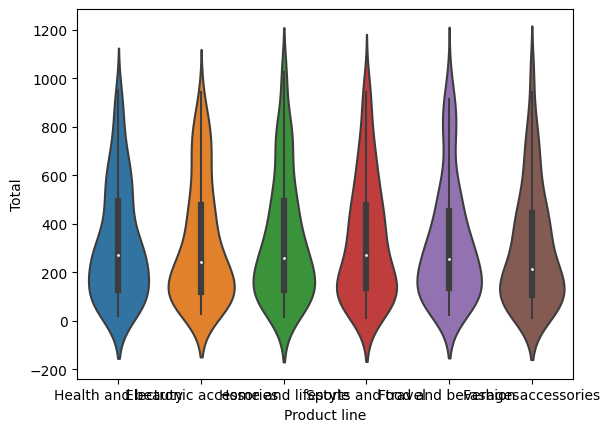

In [16]:
sns.violinplot(x='Product line', y='Total', data=df)
plt.show()


Com base na análise exploratória dos dados, podemos identificar algumas operações de pré-processamento que podem ser interessantes para o problema de previsão de vendas e gestão de estoques:

Tratar valores faltantes: podemos preencher os valores faltantes na coluna Customer type com o valor mais frequente (Member) e remover as linhas com valores faltantes em outras colunas.

Discretizar atributos numéricos: podemos discretizar a coluna Total em intervalos fixos para criar uma variável categórica que represente o nível de venda (por exemplo, baixa, média e alta). Além disso, podemos criar uma coluna adicional que indica se a venda foi lucrativa ou não com base na margem de lucro.

Codificar atributos categóricos: podemos usar a técnica de one-hot-encoding para codificar as colunas Branch, City, Gender, Customer type e Product line como variáveis binárias.

Normalizar ou padronizar atributos numéricos: podemos normalizar ou padronizar as colunas Unit price e Quantity para garantir que elas estejam na mesma escala que outras variáveis numéricas.

A seguir, vamos implementar essas transformações e salvar as visões diferentes do dataset:

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

# Carregar o dataset
df = pd.read_csv('https://raw.githubusercontent.com/karynneairampucmvp/mvppuc/main/supermarket_sales%20-%20Sheet1.csv')

# Tratar valores faltantes
df['Customer type'].fillna('Member', inplace=True)
df.dropna(inplace=True)

# Discretizar atributos numéricos
total_bins = [-np.inf, 20000, 40000, np.inf]
total_labels = ['low', 'medium', 'high']
df['Total category'] = pd.cut(df['Total'], bins=total_bins, labels=total_labels)

df['Profitable'] = np.where(df['gross income'] > 0, 'Yes', 'No')

# Codificar atributos categóricos
cat_cols = ['Branch', 'City', 'Gender', 'Customer type', 'Product line']
ohe = OneHotEncoder(drop='first')
ohe_df = pd.DataFrame(ohe.fit_transform(df[cat_cols]).toarray(), columns=ohe.get_feature_names_out(input_features=cat_cols))

df = pd.concat([df, ohe_df], axis=1)
df.drop(columns=cat_cols, inplace=True)

# Normalizar ou padronizar atributos numéricos
scaler = StandardScaler()
df[['Unit price', 'Quantity']] = scaler.fit_transform(df[['Unit price', 'Quantity']])

# Salvar as diferentes visões do dataset
df.to_csv('supermarket_sales_preprocessed.csv', index=False)
df_norm = df.copy()
df_norm[['Unit price', 'Quantity']] = MinMaxScaler().fit_transform(df_norm[['Unit price', 'Quantity']])
df_norm.to_csv('supermarket_sales_preprocessed_normalized.csv', index=False)


Vamos verificar se existem valores faltantes no dataset:

In [18]:
df.isna().sum()


Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Total category             0
Profitable                 0
dtype: int64

Converte a coluna "Date" para o tipo de dado "datetime".

In [19]:
df['Date'] = pd.to_datetime(df['Date'])


Criar uma nova coluna "Month" com o mês da venda.

In [20]:
df['Month'] = df['Date'].dt.month


Normalizar as colunas "Unit price", "Quantity", "Tax 5%", "Total", "cogs" e "gross income".
Para normalizar as colunas, vamos usar o StandardScaler da biblioteca sklearn.

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_normalize = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income']

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [36]:
df['Total_log'] = np.log(df['Total'])


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
df['Price_per_unit'] = df['Total'] / df['Quantity']


In [39]:
# preencher valores faltantes com a média
df.fillna(df.mean(numeric_only=True), inplace=True)


In [41]:
# calcular o intervalo interquartil (IQR)
# selecionar apenas colunas numéricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# calcular o intervalo interquartil (IQR)
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# remover valores discrepantes
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [22]:
df.to_csv('supermarket_sales_processed.csv', index=False)
